In [1]:
# import libraries
import math
import csv
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# read data
data = pd.read_csv("Integrated.csv")
data
feats = data.values[:,1:]
feats # the biological measurement; each row/entry is the day0-14 measurement of ONE protein

# perform standard scaling
scaler = StandardScaler()
print(scaler.fit(feats))
feats = scaler.fit_transform(feats)


# performing clustering
hierarchical_cls = AgglomerativeClustering(n_clusters=6).fit(feats)
cluster = hierarchical_cls.labels_ + 1 # get cluster label for each protein


# add cluster label back to dataset
data['cluster'] = cluster
data


# creating clusters
cluster1 = data[data['cluster']==1]

cluster2 = data[data['cluster']==2]

cluster3 = data[data['cluster']==3]

cluster4 = data[data['cluster']==4]

cluster5 = data[data['cluster']==5]

cluster6 = data[data['cluster']==6]


cluster_len = [len(cluster1),len(cluster2),len(cluster3),len(cluster4),len(cluster5),len(cluster6)]
cluster_len

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)


[860, 949, 652, 718, 474, 339]

In [3]:

# plot time series data; remove the proteins names, tranpose to make x=day, y=value
cluster1 = cluster1.drop(columns=['day', 'cluster'])
c1 = cluster1.T
c1

cluster2 = cluster2.drop(columns=['day', 'cluster'])
c2 = cluster2.T
c2

cluster3 = cluster3.drop(columns=['day', 'cluster'])
c3 = cluster3.T
c3

cluster4 = cluster4.drop(columns=['day', 'cluster'])
c4 = cluster4.T
c4

cluster5 = cluster5.drop(columns=['day', 'cluster'])
c5 = cluster5.T
c5

cluster6 = cluster6.drop(columns=['day', 'cluster'])
c6 = cluster6.T
c6

# for ci, i = 1:6,
# row = days, col = the protein 

,26,31,42,65,85,95,102,119,130,166,...,3917,3920,3921,3950,3951,3953,3974,3978,3984,3988
0,-1.000000,-0.689622,-0.733849,-1.000000,-1.000000,-0.942497,-0.794406,-1.000000,-0.350278,-0.647521,...,-1.000000,-0.883527,-0.799437,-0.955272,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.553882
1,-0.421356,-0.275054,-0.297333,-0.429071,-0.410972,-0.634188,-0.268417,-0.315753,-0.010251,-0.371760,...,-0.586360,-0.111990,-0.315441,-0.501773,-0.420972,-0.465325,-0.552751,-0.496278,-0.416889,-0.138151
3,0.654526,0.575859,0.522973,0.393406,0.505848,0.065478,0.744393,0.537236,0.436470,0.357547,...,0.280788,1.000000,0.565605,0.342007,0.346875,0.288226,0.225671,0.253865,0.406724,0.358407
5,0.947092,1.000000,0.703514,0.646967,0.583833,0.757712,1.000000,0.169780,0.162816,0.929063,...,0.656726,0.623254,1.000000,1.000000,0.666496,0.263776,0.412125,0.333278,0.403549,-0.050342
7,0.317145,0.681822,0.559785,0.298147,0.122138,1.000000,0.533674,-0.236030,-0.557553,0.905561,...,0.751428,-0.019815,0.542435,0.660999,0.654810,0.002003,0.186232,0.161603,0.095494,-0.409118
10,-0.487643,-0.294585,0.244910,-0.241848,-0.238822,0.179610,-0.496741,-0.122591,-0.681204,-0.172890,...,0.421237,-0.422570,-0.247271,-0.068436,0.277434,0.037084,0.083728,0.132897,-0.018463,-0.206914
14,-0.009763,-0.998419,-1.000000,0.332399,0.437976,-0.426116,-0.718504,0.967358,1.000000,-1.000000,...,-0.523818,-0.185353,-0.745890,-0.477525,-0.524642,0.874237,0.644996,0.614635,0.529585,1.000000


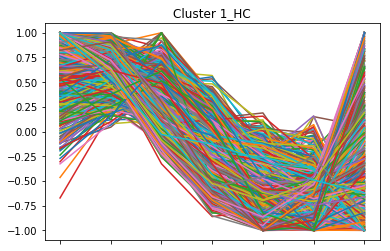

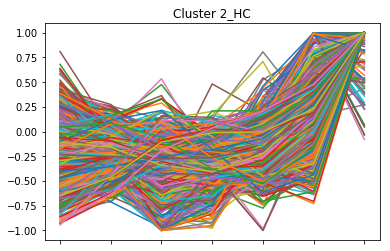

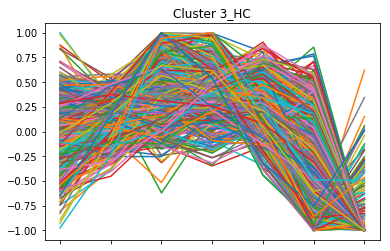

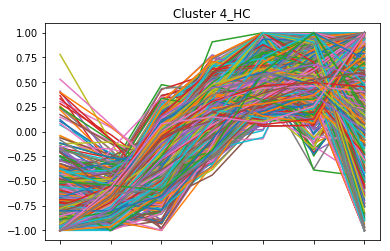

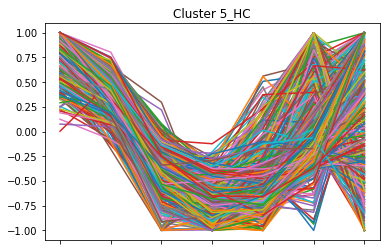

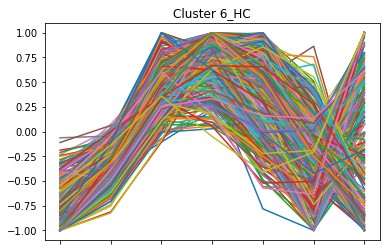

In [4]:
# plotting and saving the trends within each cluster

c1.plot(kind='line', legend=False)
plt.title('Cluster 1_HC')
plt.savefig('HC_cluster1.png')

c2.plot(kind='line', legend=False)
plt.title('Cluster 2_HC')
plt.savefig('HC_cluster2.png')

c3.plot(kind='line', legend=False)
plt.title('Cluster 3_HC')
plt.savefig('HC_cluster3.png')

c4.plot(kind='line', legend=False)
plt.title('Cluster 4_HC')
plt.savefig('HC_cluster4.png')

c5.plot(kind='line', legend=False)
plt.title('Cluster 5_HC')
plt.savefig('HC_cluster5.png')

c6.plot(kind='line', legend=False)
plt.title('Cluster 6_HC')
plt.savefig('HC_cluster6.png')

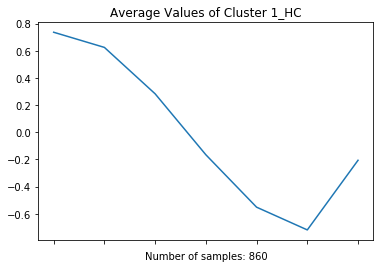

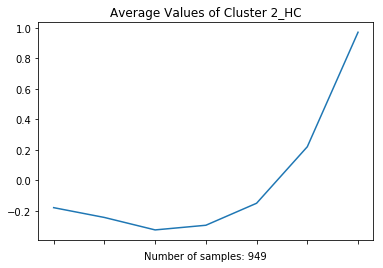

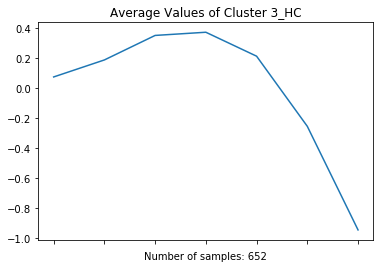

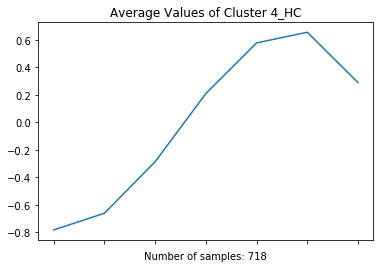

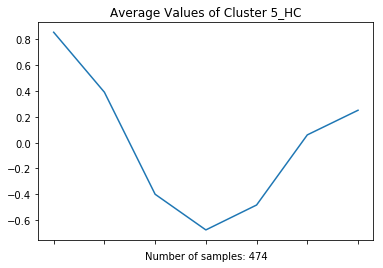

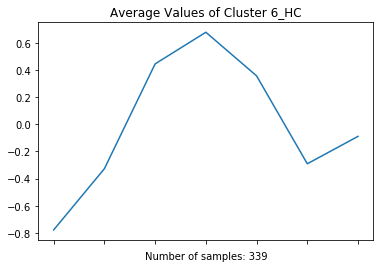

In [5]:
# plot center for each day (i.e. average value for days 0 1 3 5 7 10 14)
# how to do: take average value in each column

plt.figure(1) 
avg_c1 = np.mean(cluster1,axis=0)
avg_c1
avg_c1.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 1_HC')
plt.xlabel('Number of samples: 860' )
plt.savefig('HC_avg_cluster1.png')

plt.figure(2) 
avg_c2 = np.mean(cluster2,axis=0)
avg_c2
avg_c2.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 2_HC')
plt.xlabel('Number of samples: 949' )
plt.savefig('HC_avg_cluster2.png')

plt.figure(3) 
avg_c3 = np.mean(cluster3,axis=0)
avg_c3
avg_c3.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 3_HC')
plt.xlabel('Number of samples: 652' )
plt.savefig('HC_avg_cluster3.png')

plt.figure(4) 
avg_c4 = np.mean(cluster4,axis=0)
avg_c4
avg_c4.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 4_HC')
plt.xlabel('Number of samples: 718' )
plt.savefig('HC_avg_cluster4.png')

plt.figure(5) 
avg_c5 = np.mean(cluster5,axis=0)
avg_c5
avg_c5.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 5_HC')
plt.xlabel('Number of samples: 474' )
plt.savefig('HC_avg_cluster5.png')

plt.figure(6) 
avg_c6 = np.mean(cluster6,axis=0)
avg_c6
avg_c6.plot(kind='line', legend=False)
plt.title('Average Values of Cluster 6_HC')
plt.xlabel('Number of samples: 339' )
plt.savefig('HC_avg_cluster6.png')

In [44]:
#     - calculate loss by measuring L2 distance between values and centroid for each day
#     - sum the loss for days, then loss for proteins and divide by total proteins to get average
#     - each day & cluster has a loss

# HOW TO DO:
#   - save sum of loss for each day into a vector, then take average for each day

# array that saves the loss for each cluster
loss_by_cluster = []
days = list(range(0,7))

#cluster 1
loss_c1 = []
for i in days:
    for j in range(0,len(cluster1)):
        loss_by_day = sum((cluster1.iloc[:, i].values - avg_c1[i])**2) # loss per day, L2 norm
    loss_c1.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c1.append(sum(loss_c1[0:7])/len(cluster1)) # get total loss for all days per protein each cluster
#loss_c1


#cluster 2
loss_c2 = []
for i in days:
    for j in range(0,len(cluster2)):
        loss_by_day = sum((cluster2.iloc[:, i].values - avg_c2[i])**2) # loss per day, L2 norm
    loss_c2.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c2.append(sum(loss_c2[0:7])/len(cluster2)) # get total loss for all days per protein each cluster
#loss_c2

#cluster 3
loss_c3 = []
for i in days:
    for j in range(0,len(cluster3)):
        loss_by_day = sum((cluster3.iloc[:, i].values - avg_c3[i])**2) # loss per day, L2 norm
    loss_c3.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c3.append(sum(loss_c3[0:7])/len(cluster3)) # get total loss for all days per protein each cluster
#loss_c3

#cluster 4
loss_c4 = []
for i in days:
    for j in range(0,len(cluster4)):
        loss_by_day = sum((cluster4.iloc[:, i].values - avg_c4[i])**2) # loss per day, L2 norm
    loss_c4.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c4.append(sum(loss_c4[0:7])/len(cluster4)) # get total loss for all days per protein each cluster
#loss_c4

#cluster 5
loss_c5 = []
for i in days:
    for j in range(0,len(cluster5)):
        loss_by_day = sum((cluster5.iloc[:, i].values - avg_c5[i])**2) # loss per day, L2 norm
    loss_c5.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c5.append(sum(loss_c5[0:7])/len(cluster5)) # get total loss for all days per protein each cluster
#loss_c5

#cluster 6
loss_c6 = []
for i in days:
    for j in range(0,len(cluster6)):
        loss_by_day = sum((cluster6.iloc[:, i].values - avg_c6[i])**2) # loss per day, L2 norm
    loss_c6.append(loss_by_day ** (1/2)) # sqrt to complete L2 norm calculation
loss_c6.append(sum(loss_c6[0:7])/len(cluster6)) # get total loss for all days per protein each cluster
loss_c6

[4.396148043018087,
 3.4582052469593014,
 4.362883203893704,
 4.809422568308999,
 7.69296199091165,
 7.605335783244569,
 13.973649144292464,
 0.1365740589399079]

In [45]:
# create dataframe showing L2 norm loss based on days and the total loss
columns = ['day_0','day_1','day_3','day_5','day_7','day_10','day_14', 'total loss for all days per protein']
cluster_name = ['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6']
data = np.array([loss_c1, loss_c2, loss_c3, loss_c4, loss_c5, loss_c6])
kmeans_loss = pd.DataFrame(data, columns=columns)
kmeans_loss['cluster_name']=cluster_name
cols = kmeans_loss.columns.tolist()
cols = cols[-1:] + cols[:-1]
kmeans_loss = kmeans_loss[cols]
kmeans_loss

,cluster_name,day_0,day_1,day_3,day_5,day_7,day_10,day_14,total loss for all days per protein
0,cluster_1,9.030499,5.196547,7.627762,8.500417,8.131448,7.806806,18.970664,0.075889
1,cluster_2,9.753221,6.315823,7.847156,6.622187,7.278144,10.928363,4.007988,0.055588
2,cluster_3,8.119688,5.163277,7.604944,6.186566,6.315974,10.983031,4.771918,0.075376
3,cluster_4,7.923323,4.499202,7.646896,7.249832,6.892700,8.527373,16.184420,0.082066
4,cluster_5,4.678464,4.233042,5.323633,4.599974,6.566555,9.418646,13.947732,0.102886
5,cluster_6,4.396148,3.458205,4.362883,4.809423,7.692962,7.605336,13.973649,0.136574


In [47]:
sum(kmeans_loss['total loss for all days per protein'])/6

0.08806325143446064

In [ ]:
# find other ways to compare clustering methods
# standardize/scale data in hc before plotting

In [ ]:
# NOTES AFTER SCALING:
- does cluster 1, 2 resemble the manuscript plots enough?

# COMPARING CLUSTERING METHODS:
- Silhouette Value:
    - shows how well a value fits in the cluster
- Compare clustering method to random clustering
    - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3785067/
    - want low correlation between results
    